## Assignment 3

### 4 MDP Policy Equations with deterministic policy:

$V^{\pi _{D}}(s) = Q^{\pi _{D}}(s,\pi (s)) $ for all $s \in S$  
$Q^{\pi _{D}}(s,a) = R^{a}_{s}+\gamma\cdot\sum_{s'\in S}P_{s,s'}^{a}\cdot V^{\pi _{D}}(s') $for all $s \in S, a \in A$  
$V^{\pi _{D}}(s)= R^{\pi_{D}(s)}_{s}+\gamma\cdot\sum_{s'\in S}P_{s,s'}^{\pi_{D}(s)}\cdot V^{\pi _{D}}(s') $for all $s \in S$  
$Q^{\pi _{D}}(s,a) = R^{a}_{s}+\gamma\cdot\sum_{s'\in S}P_{s,s'}^{a}\cdot Q^{\pi _{D}}(s',\pi_{D}(s') $for all $s \in S, a \in A$  

### Lilypads:


The state space $\mathcal S=\{0,1,...,n\}=\{i|0\leqslant i\leqslant n\}$. 0 and n are terminating states.  
The action space $\mathcal A=\{A,B\}$  
Transition functions are:  
$ Pr[i'|i,A]$ for $1\leqslant i\leqslant n-1 =
\begin{cases}
\frac{i}{n} \ \text{for} \ i'=i-1\\
\frac{n-i}{n} \ \text{for} \ i=i+1
\end{cases}
$  
$ Pr[i'|i,B]$ for $1\leqslant i\leqslant n-1 = \frac{1}{n}$ for $0\leqslant i'\leqslant n$ and $i'\neq i$  
Reward function:  
$\mathcal R(i,a,i') =
\begin{cases}
1 \ \text{for} \ i'=n \\
0 \ \text{otherwise} 
\end{cases}
$

In [1]:
import operator
from typing import Mapping, Dict, Tuple
from rl.markov_decision_process import FiniteMarkovDecisionProcess,FinitePolicy
from rl.distribution import Categorical, Constant
from rl.markov_decision_process import StateActionMapping
from rl.dynamic_programming import value_iteration_result
from pprint import pprint

In [2]:
LilypadMapping = StateActionMapping[int, str]
class Lilypad(FiniteMarkovDecisionProcess[int,str]):
    def __init__(self, n):
        self.n: int = n
        super().__init__(self.get_action_transition_reward_map())
    
    def get_action_transition_reward_map(self)->LilypadMapping:
        d: Dict[int, Dict[str, Categorical[Tuple[int,int]]]] = {}
        states: list = []
        for i in range(self.n+1):
            states.append(i)
                
        actions: Tuple[str,str] = {'A','B'}
        for i in range(self.n+1):
            d1: Dict[str,Categorical[Tuple[int,int]]]={}
            if (i == 0) or (i == self.n):
                d[i] = None
            else:
                if i+1 == self.n:
                    reward = 1
                else:
                    reward = 0
                probs_dict_A: Dict[Tuple[int, int], float] =\
                    {(i-1, 0): i/self.n}
                probs_dict_A[(i+1,reward)]=(self.n-i)/self.n
                d1['A'] = Categorical(probs_dict_A)
                
                probs_dict_B: Dict[Tuple[int, int], float] =\
                    {(j,0): 1/self.n for j in range(self.n) if j!=i }
                probs_dict_B[(self.n,1)]=1/self.n
                d1['B'] = Categorical(probs_dict_B)
                d[i]=d1
        return d


In [3]:
def getPolicies(n):
    binary_list = []
    for i in range(2**(n-1)):
        binary = str(bin(i))[2:]
        binary_list.append(list('0'*(n-1-len(binary))+binary))
    policies=[]
    for item in binary_list:
        policy1:list=[None]
        policy2:list=['A' if i == '1' else 'B' for i in item]
        policies.append(policy1+policy2+policy1)
    return policies

In [4]:
import numpy as np
from rl.markov_process import FiniteMarkovProcess, FiniteMarkovRewardProcess

def getOptimal(n):
    lp_mdp: FiniteMarkovDecisionProcess[int,int] = Lilypad(n = n)
    policies = getPolicies(n)
    opt_val = np.zeros(n-1)
    opt_police = None
    for policy in policies:
        curr_policy: FinitePolicy[int, int] = FinitePolicy({j: Constant(policy[j]) for j in range(n+1)})
        implied_mrp: FiniteMarkovRewardProcess[int] =\
            lp_mdp.apply_finite_policy(curr_policy)
        curr_val:np.ndarray = implied_mrp.get_value_function_vec(gamma=1.)
        if  np.all(curr_val>opt_val):
            opt_val = curr_val
            opt_policy = curr_policy
    
    return opt_val,opt_policy         

In [5]:
getOptimal(n=3)

(array([0.57142857, 0.71428571]),
 For State 0:
   Do Action None with Probability 1.000
 For State 1:
   Do Action B with Probability 1.000
 For State 2:
   Do Action A with Probability 1.000
 For State 3:
   Do Action None with Probability 1.000)

In [6]:
getOptimal(n=6)

(array([0.65957447, 0.70212766, 0.72340426, 0.74468085, 0.78723404]),
 For State 0:
   Do Action None with Probability 1.000
 For State 1:
   Do Action B with Probability 1.000
 For State 2:
   Do Action A with Probability 1.000
 For State 3:
   Do Action A with Probability 1.000
 For State 4:
   Do Action A with Probability 1.000
 For State 5:
   Do Action A with Probability 1.000
 For State 6:
   Do Action None with Probability 1.000)

In [7]:
getOptimal(n=9)

(array([0.67567568, 0.70523649, 0.71368243, 0.71790541, 0.72128378,
        0.72550676, 0.7339527 , 0.76351351]),
 For State 0:
   Do Action None with Probability 1.000
 For State 1:
   Do Action B with Probability 1.000
 For State 2:
   Do Action A with Probability 1.000
 For State 3:
   Do Action A with Probability 1.000
 For State 4:
   Do Action A with Probability 1.000
 For State 5:
   Do Action A with Probability 1.000
 For State 6:
   Do Action A with Probability 1.000
 For State 7:
   Do Action A with Probability 1.000
 For State 8:
   Do Action A with Probability 1.000
 For State 9:
   Do Action None with Probability 1.000)

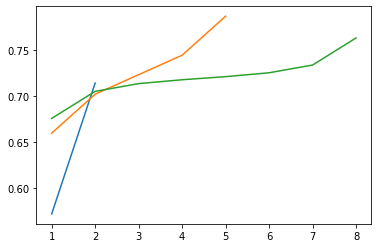

In [8]:
import matplotlib.pyplot as plt
for i in [3,6,9]:
    opt_val, opt_policy=getOptimal(i)
    x = np.arange(1, i, 1)
    plt.plot(x,opt_val)